In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout
from tensorflow.keras.optimizers import Adam,SGD

In [ ]:
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
from keras.utils import to_categorical
x_train=train_images.astype('float32')/255
x_test=test_images.astype('float32')/255
print(train_images)
x_train=x_train.reshape((60000,28,28,1))
x_test=x_test.reshape((10000,28,28,1))
print(x_train)
#train_labels=to_categorical(train_labels)
#test_labels=to_categorical(test_labels)


[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
 

In [ ]:
y_train=to_categorical(train_labels)
y_test=to_categorical(test_labels)
#y_train=train_labels
#y_test=test_labels
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
#GlorotUniform - L1
cnn=Sequential()
cnn.add(Conv2D(28,(3,3),activation='relu',input_shape=(28,28,1),kernel_initializer='glorot_uniform',kernel_regularizer='L1'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(56,(3,3),activation='relu',kernel_initializer='glorot_uniform',kernel_regularizer='L1'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(56,(3,3),activation='relu',kernel_initializer='glorot_uniform',kernel_regularizer='L1'))
cnn.add(Flatten())
cnn.add(Dropout(0.2))
cnn.add(Dense(56,activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(10,activation='softmax'))

cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history1=cnn.fit(train_images,train_labels,epochs=10,batch_size=1000,validation_split=0.2)

test_loss,test_acc=cnn.evaluate(test_images,test_labels,verbose=2)
print('Test accuracy:',test_acc)

Epoch 1/10
48/48 [==============================] - 64s 1s/step - loss: 18.2392 - accuracy: 0.4309 - val_loss: 13.4281 - val_accuracy: 0.8710
Epoch 2/10
48/48 [==============================] - 43s 908ms/step - loss: 11.3497 - accuracy: 0.8262 - val_loss: 8.9601 - val_accuracy: 0.9465
Epoch 3/10
48/48 [==============================] - 47s 981ms/step - loss: 7.6669 - accuracy: 0.8958 - val_loss: 6.1540 - val_accuracy: 0.9589
Epoch 4/10
48/48 [==============================] - 44s 912ms/step - loss: 5.3647 - accuracy: 0.9151 - val_loss: 4.3419 - val_accuracy: 0.9679
Epoch 5/10
48/48 [==============================] - 43s 905ms/step - loss: 3.8617 - accuracy: 0.9258 - val_loss: 3.1661 - val_accuracy: 0.9672
Epoch 6/10
48/48 [==============================] - 48s 984ms/step - loss: 2.8676 - accuracy: 0.9305 - val_loss: 2.3454 - val_accuracy: 0.9715
Epoch 7/10
48/48 [==============================] - 48s 1s/step - loss: 2.1703 - accuracy: 0.9358 - val_loss: 1.7790 - val_accuracy: 0.9716
Ep

In [ ]:
#GolortUniform - L2
cnn=Sequential()
cnn.add(Conv2D(28,(3,3),activation='relu',input_shape=(28,28,1),kernel_initializer='glorot_uniform',kernel_regularizer='L2'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(56,(3,3),activation='relu',kernel_initializer='glorot_uniform',kernel_regularizer='L2'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(56,(3,3),activation='relu',kernel_initializer='glorot_uniform',kernel_regularizer='L2'))
cnn.add(Flatten())
cnn.add(Dropout(0.2))
cnn.add(Dense(56,activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(10,activation='softmax'))

cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history1=cnn.fit(train_images,train_labels,epochs=10,batch_size=1000,validation_split=0.2)

test_loss,test_acc=cnn.evaluate(test_images,test_labels,verbose=2)
print('Test accuracy:',test_acc)

Epoch 1/10
48/48 [==============================] - 45s 905ms/step - loss: 4.7747 - accuracy: 0.4365 - val_loss: 1.3973 - val_accuracy: 0.8580
Epoch 2/10
48/48 [==============================] - 51s 1s/step - loss: 1.4541 - accuracy: 0.8156 - val_loss: 1.0103 - val_accuracy: 0.9487
Epoch 3/10
48/48 [==============================] - 44s 914ms/step - loss: 1.1332 - accuracy: 0.9008 - val_loss: 0.8819 - val_accuracy: 0.9670
Epoch 4/10
48/48 [==============================] - 43s 907ms/step - loss: 0.9763 - accuracy: 0.9310 - val_loss: 0.7971 - val_accuracy: 0.9736
Epoch 5/10
48/48 [==============================] - 47s 980ms/step - loss: 0.8745 - accuracy: 0.9438 - val_loss: 0.7302 - val_accuracy: 0.9786
Epoch 6/10
48/48 [==============================] - 43s 909ms/step - loss: 0.7938 - accuracy: 0.9530 - val_loss: 0.6711 - val_accuracy: 0.9825
Epoch 7/10
48/48 [==============================] - 46s 972ms/step - loss: 0.7256 - accuracy: 0.9594 - val_loss: 0.6225 - val_accuracy: 0.9837
Ep

In [ ]:
#Orthogonal - L1
cnn=Sequential()
cnn.add(Conv2D(28,(3,3),activation='relu',input_shape=(28,28,1),kernel_initializer='orthogonal',kernel_regularizer='L1'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(56,(3,3),activation='relu',kernel_initializer='orthogonal',kernel_regularizer='L1'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(56,(3,3),activation='relu',kernel_initializer='orthogonal',kernel_regularizer='L1'))
cnn.add(Flatten())
cnn.add(Dropout(0.2))
cnn.add(Dense(56,activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(10,activation='softmax'))

cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history1=cnn.fit(train_images,train_labels,epochs=10,batch_size=1000,validation_split=0.2)

test_loss,test_acc=cnn.evaluate(test_images,test_labels,verbose=2)
print('Test accuracy:',test_acc)

Epoch 1/10
48/48 [==============================] - 48s 969ms/step - loss: 25.4152 - accuracy: 0.3240 - val_loss: 16.6206 - val_accuracy: 0.6155
Epoch 2/10
48/48 [==============================] - 44s 914ms/step - loss: 15.4171 - accuracy: 0.5942 - val_loss: 13.4681 - val_accuracy: 0.8721
Epoch 3/10
48/48 [==============================] - 44s 911ms/step - loss: 12.7513 - accuracy: 0.7869 - val_loss: 11.3734 - val_accuracy: 0.9321
Epoch 4/10
48/48 [==============================] - 45s 929ms/step - loss: 10.8520 - accuracy: 0.8551 - val_loss: 9.7993 - val_accuracy: 0.9498
Epoch 5/10
48/48 [==============================] - 52s 1s/step - loss: 9.3809 - accuracy: 0.8816 - val_loss: 8.5213 - val_accuracy: 0.9580
Epoch 6/10
48/48 [==============================] - 44s 912ms/step - loss: 8.1861 - accuracy: 0.8973 - val_loss: 7.4561 - val_accuracy: 0.9631
Epoch 7/10
48/48 [==============================] - 44s 917ms/step - loss: 7.1855 - accuracy: 0.9083 - val_loss: 6.5628 - val_accuracy: 0.

In [ ]:
#Orthogonal - L2
cnn=Sequential()
cnn.add(Conv2D(28,(3,3),activation='relu',input_shape=(28,28,1),kernel_initializer='orthogonal',kernel_regularizer='L2'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(56,(3,3),activation='relu',kernel_initializer='orthogonal',kernel_regularizer='L2'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(56,(3,3),activation='relu',kernel_initializer='orthogonal',kernel_regularizer='L2'))
cnn.add(Flatten())
cnn.add(Dropout(0.2))
cnn.add(Dense(56,activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(10,activation='softmax'))

cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history1=cnn.fit(train_images,train_labels,epochs=10,batch_size=1000,validation_split=0.2)

test_loss,test_acc=cnn.evaluate(test_images,test_labels,verbose=2)
print('Test accuracy:',test_acc)

Epoch 1/10
48/48 [==============================] - 48s 980ms/step - loss: 9.6164 - accuracy: 0.2821 - val_loss: 2.3083 - val_accuracy: 0.6373
Epoch 2/10
48/48 [==============================] - 43s 907ms/step - loss: 2.1724 - accuracy: 0.6708 - val_loss: 1.4110 - val_accuracy: 0.9068
Epoch 3/10
48/48 [==============================] - 45s 945ms/step - loss: 1.6369 - accuracy: 0.8290 - val_loss: 1.2314 - val_accuracy: 0.9443
Epoch 4/10
48/48 [==============================] - 44s 913ms/step - loss: 1.4274 - accuracy: 0.8770 - val_loss: 1.1397 - val_accuracy: 0.9563
Epoch 5/10
48/48 [==============================] - 44s 911ms/step - loss: 1.2992 - accuracy: 0.9011 - val_loss: 1.0735 - val_accuracy: 0.9613
Epoch 6/10
48/48 [==============================] - 46s 966ms/step - loss: 1.1900 - accuracy: 0.9213 - val_loss: 1.0051 - val_accuracy: 0.9702
Epoch 7/10
48/48 [==============================] - 44s 910ms/step - loss: 1.1087 - accuracy: 0.9339 - val_loss: 0.9528 - val_accuracy: 0.9741

In [ ]:
#zeros - L1
cnn=Sequential()
cnn.add(Conv2D(28,(3,3),activation='relu',input_shape=(28,28,1),kernel_initializer='zeros',kernel_regularizer='L1'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(56,(3,3),activation='relu',kernel_initializer='zeros',kernel_regularizer='L1'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(56,(3,3),activation='relu',kernel_initializer='zeros',kernel_regularizer='L1'))
cnn.add(Flatten())
cnn.add(Dropout(0.2))
cnn.add(Dense(56,activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(10,activation='softmax'))

cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history1=cnn.fit(train_images,train_labels,epochs=10,batch_size=1000,validation_split=0.2)

test_loss,test_acc=cnn.evaluate(test_images,test_labels,verbose=2)
print('Test accuracy:',test_acc)

Epoch 1/10
48/48 [==============================] - 46s 924ms/step - loss: 2.3022 - accuracy: 0.1135 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 2/10
48/48 [==============================] - 43s 902ms/step - loss: 2.3015 - accuracy: 0.1140 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch 3/10
48/48 [==============================] - 43s 906ms/step - loss: 2.3012 - accuracy: 0.1140 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch 4/10
48/48 [==============================] - 47s 972ms/step - loss: 2.3011 - accuracy: 0.1140 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch 5/10
48/48 [==============================] - 46s 952ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3020 - val_accuracy: 0.1060
Epoch 6/10
48/48 [==============================] - 43s 899ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3020 - val_accuracy: 0.1060
Epoch 7/10
48/48 [==============================] - 43s 894ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060

In [ ]:
#zeros - L2
cnn=Sequential()
cnn.add(Conv2D(28,(3,3),activation='relu',input_shape=(28,28,1),kernel_initializer='zeros',kernel_regularizer='L2'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(56,(3,3),activation='relu',kernel_initializer='zeros',kernel_regularizer='L2'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(56,(3,3),activation='relu',kernel_initializer='zeros',kernel_regularizer='L2'))
cnn.add(Flatten())
cnn.add(Dropout(0.2))
cnn.add(Dense(56,activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(10,activation='softmax'))

cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history1=cnn.fit(train_images,train_labels,epochs=10,batch_size=1000,validation_split=0.2)

test_loss,test_acc=cnn.evaluate(test_images,test_labels,verbose=2)
print('Test accuracy:',test_acc)

Epoch 1/10
48/48 [==============================] - 47s 964ms/step - loss: 2.3022 - accuracy: 0.1130 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 2/10
48/48 [==============================] - 44s 911ms/step - loss: 2.3015 - accuracy: 0.1140 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch 3/10
48/48 [==============================] - 43s 901ms/step - loss: 2.3012 - accuracy: 0.1140 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch 4/10
48/48 [==============================] - 46s 946ms/step - loss: 2.3011 - accuracy: 0.1140 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch 5/10
48/48 [==============================] - 43s 895ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3020 - val_accuracy: 0.1060
Epoch 6/10
48/48 [==============================] - 45s 949ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3020 - val_accuracy: 0.1060
Epoch 7/10
48/48 [==============================] - 43s 896ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060

In [ ]:
y_pred=np.round(y_pred)

array([[0.11045607, 0.11700821, 0.09262078, ..., 0.10554646, 0.10023309,
        0.09451049],
       [0.11233509, 0.11641664, 0.09290677, ..., 0.10313841, 0.0999195 ,
        0.0942086 ],
       [0.11013671, 0.11900863, 0.09252157, ..., 0.10491689, 0.09977479,
        0.09442116],
       ...,
       [0.1099337 , 0.11652096, 0.09228905, ..., 0.10415909, 0.10006519,
        0.09402449],
       [0.1109815 , 0.11527959, 0.09184102, ..., 0.10289025, 0.10021061,
        0.09482065],
       [0.11229502, 0.11672255, 0.09265729, ..., 0.10261215, 0.09915321,
        0.09381711]], dtype=float32)

In [ ]:
y_classes[0]

1

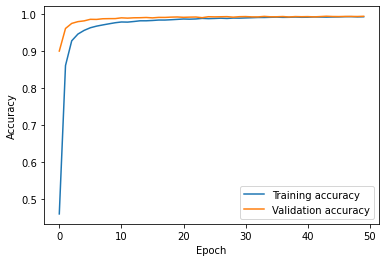

In [ ]:
import matplotlib.pyplot as plt
train_loss=history1.history['accuracy']
val_loss=history1.history['val_accuracy']
plt.plot(train_loss,label='Training accuracy')
plt.plot(val_loss,label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

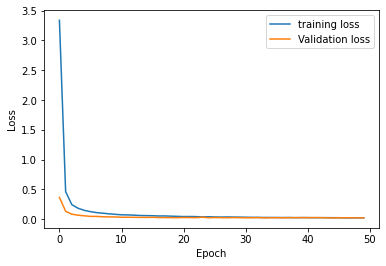

In [ ]:
import matplotlib.pyplot as plt
train_loss=history1.history['loss']
val_loss=history1.history['val_loss']
plt.plot(train_loss,label='training loss')
plt.plot(val_loss,label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

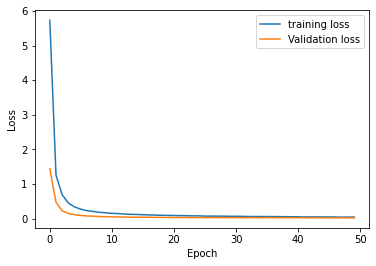

In [ ]:
import matplotlib.pyplot as plt
train_loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(train_loss,label='training loss')
plt.plot(val_loss,label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()